<a href="https://colab.research.google.com/github/auroramugnai/Naimark-Dilations/blob/main/DilationWithRankTwoMeasurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We refer to Lemma B.3 in the Appendix of https://arxiv.org/abs/2410.16447.
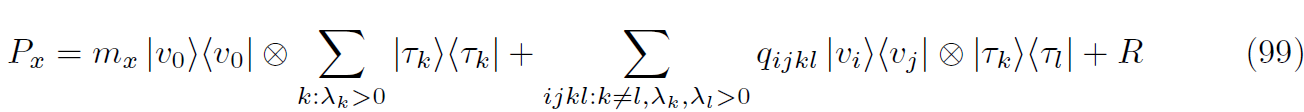


$P_{x}$ is a projector that acts on the joint system System + Ancilla. In the following, we call this projector $\Pi_{SA}$.

In [16]:
# !pip install picos

from matplotlib import pyplot as plt
import numpy as np
import picos as pic
from picos.modeling.problem import Problem

Bit structure:
* First bit  --> System
* Second bit --> Ancilla


On the diagonal of the Ancilla, we want to set to zero the coefficients of
the off-diagonal terms of the System: $|00\rangle\langle10|, |10\rangle\langle00|, |01\rangle\langle11|, |11\rangle\langle01|$.

In [12]:
dim = 4
problem = Problem()
PiSA = pic.SymmetricVariable('PiSA', shape=(dim, dim))
problem.add_constraint(PiSA >> 0)  # positive semidefinite constraint

#       0  1  2  3
#       00 01 10 11
# 0 00  *  *  0  *
# 1 01  *  *  *  0
# 2 10  0  *  *  *
# 3 11  *  0  *  *
problem.add_constraint(PiSA[0,2] == 0)
problem.add_constraint(PiSA[2,0] == 0)
problem.add_constraint(PiSA[1,3] == 0)
problem.add_constraint(PiSA[3,1] == 0)

<1×1 Affine Constraint: PiSA[3,1] = 0>

(OPTIONAL!)

Additional constraints to impose that the measurement $M_S$ is rank one
and equal to $|0\rangle\langle0|$. Specifically, we force the coefficients of $|10\rangle\langle10|$ and $|11\rangle\langle11|$ to zero. These additional zeros are marked as 'O':

In [5]:
#       0  1  2  3
#       00 01 10 11
# 0 00  *  *  0  *
# 1 01  *  *  *  0
# 2 10  0  *  O  *
# 3 11  *  0  *  O
#
# Note: The South-East 2x2 block has det < 0, hence we already see that the matrix cannot be PSD!

problem.add_constraint(PiSA[2,2] == 0)
problem.add_constraint(PiSA[3,3] == 0)

<1×1 Affine Constraint: PiSA[3,3] = 0>

Constraint that sets the coefficient $d_{0101}$ associated with $|00\rangle\langle11|$ as a positive number $p\geq0.1$.

In [13]:
#       0  1  2  3
#       00 01 10 11
# 0 00  *  *  0  p
# 1 01  *  *  *  0
# 2 10  0  *  O  *
# 3 11  p  0  *  O
problem.add_constraint(PiSA[0,3] >= 0.1)  # p = 0.1

# Set a dummy objective (maximize a constant) just to solve the feasibility problem.
one = pic.Constant('1', 1)
problem.set_objective('max', one)

problem.solve(verbosity=True)
result = np.matrix(PiSA.value_as_matrix)
print(result)

            PICOS 2.6.1            
Problem type: Semidefinite Program.
Searching a solution strategy.
Solution strategy:
  1. ExtraOptions
  2. CVXOPTSolver
Applying ExtraOptions.
Building a CVXOPT problem instance.
Starting solution search.
-----------------------------------
 Python Convex Optimization Solver 
    via internal CONELP solver     
-----------------------------------
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00  1.0000e-01  5e+00  2e+00  2e+00  1e+00
 1:  0.0000e+00  4.3458e-02  9e-01  4e-01  3e-01  2e-01
 2:  0.0000e+00  4.3525e-04  1e-02  5e-03  4e-03  2e-03
 3:  0.0000e+00  4.3529e-06  1e-04  5e-05  4e-05  2e-05
 4:  0.0000e+00  4.3529e-08  1e-06  5e-07  4e-07  2e-07
 5:  0.0000e+00  4.3529e-10  1e-08  5e-09  4e-09  2e-09
 6:  0.0000e+00  4.3529e-12  1e-10  5e-11  4e-11  2e-11
Optimal solution found.
------------[ CVXOPT ]-------------
Solver claims optimal solution for feasible problem.
Applying the solution.
Applied solution is primal feas

# Plot

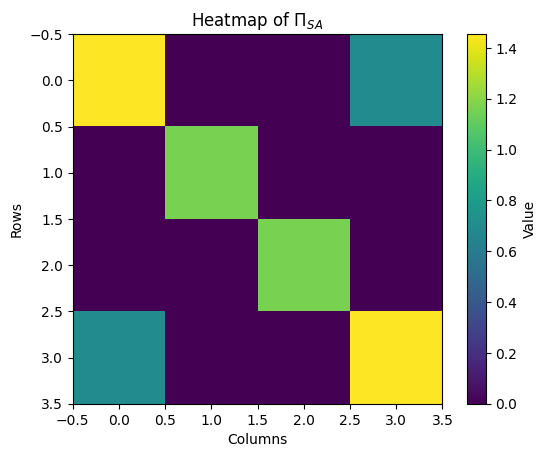

In [17]:
plt.imshow(result, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Heatmap of $\Pi_{SA}$')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()